In [258]:
from __future__ import print_function
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('always')

In [259]:
data1= pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")
data2=pd.read_csv("/kaggle/input/all-agriculture-related-datasets-for-india/csv")
data=pd.read_csv("/kaggle/input/soil-types/soil.csv")



In [260]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [261]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [262]:

data1.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [263]:
data2.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [264]:
states=data2.state.value_counts().index

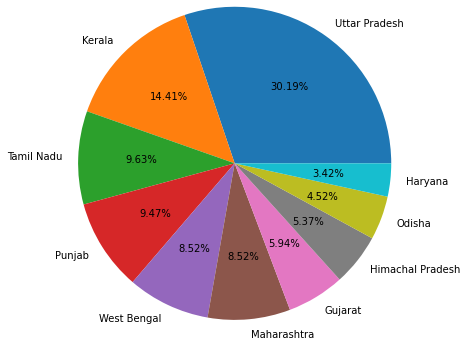

In [265]:
plt.pie(data2.state.value_counts().to_list()[:10], labels=data2.state.value_counts().index[:10], radius=1.8, autopct="%0.2f%%")
plt.show()

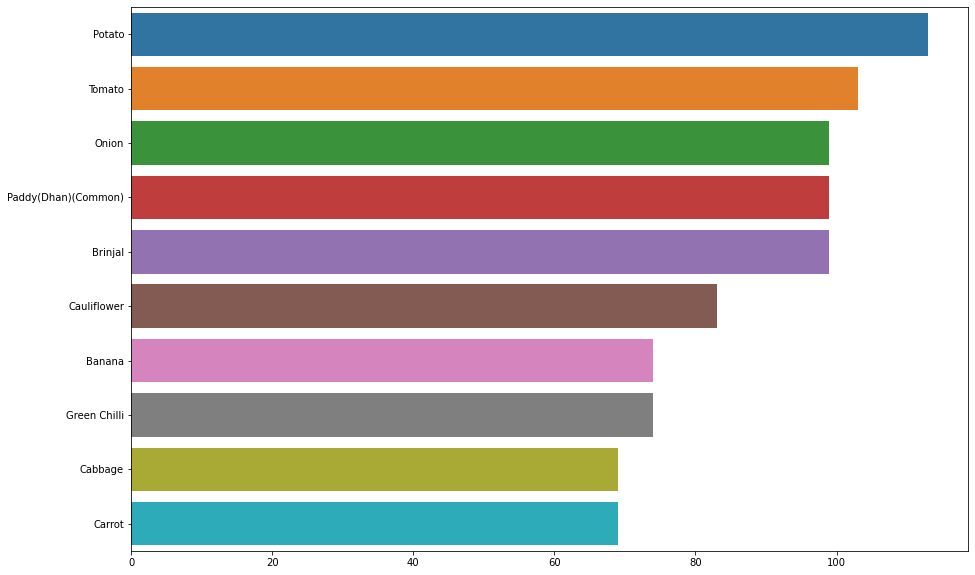

In [266]:
values = data2.commodity.value_counts().to_list()[:10]
labels = data2.commodity.value_counts().index[:10]

plt.figure(figsize=(15,10))
sns.barplot(x=values, y=labels)
plt.show()

In [267]:
data1['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<AxesSubplot:>

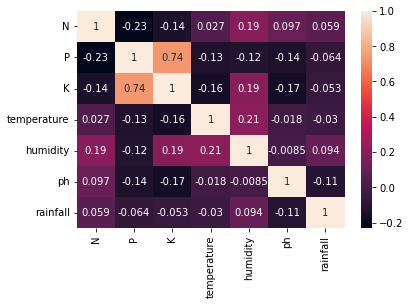

In [268]:
sns.heatmap(data1.corr(),annot=True)

<AxesSubplot:>

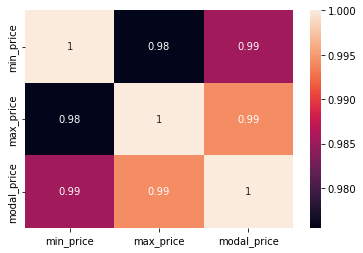

In [269]:
sns.heatmap(data2.corr(),annot=True)

In [270]:
var = data1[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data1['label']
labels = data1['label']

In [271]:
temps = []
model = []

In [272]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(var,target,test_size = 0.2,random_state =2)

In [273]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
temps.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [274]:
score = cross_val_score(NaiveBayes,var,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [275]:
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

In [276]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain.values,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
temps.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [277]:
score = cross_val_score(RF,var,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [278]:
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

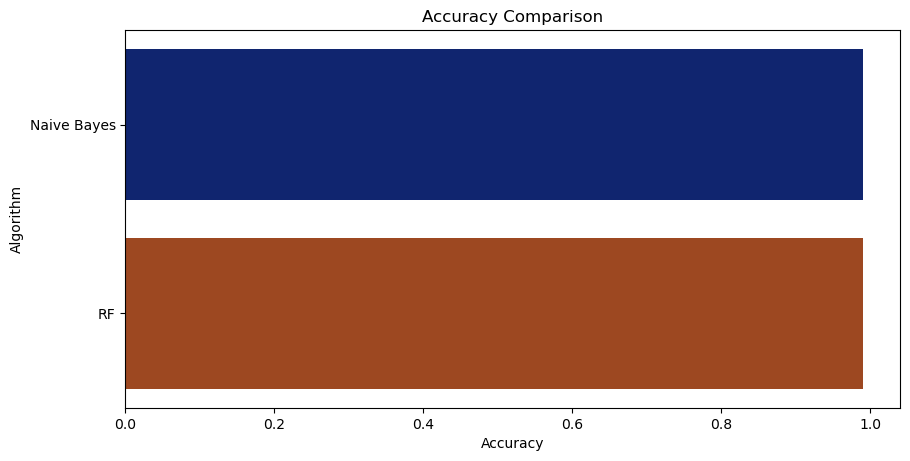

In [279]:
    plt.figure(figsize=[10,5],dpi = 100)
    plt.title('Accuracy Comparison')
    plt.xlabel('Accuracy')
    plt.ylabel('Algorithm')
    sns.barplot(x = temps,y = model,palette='dark')

In [280]:
accuracy_models = dict(zip(model, temps))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Naive Bayes --> 0.990909090909091
RF --> 0.990909090909091


In [281]:

data = np.array([[113, 85, 115, 43, 80.3, 8.0, 150.9]])
prediction = RF.predict(data)
d={}
for i in data2['commodity'].values:
    for j in data2['modal_price']:
        d[i]=j
my_list=data2['commodity'].values


In [282]:
data=pd.read_csv("/kaggle/input/soil-types/soil.csv")
dic={}
for i in range(len(data['State'])):
    dic[(data['State'][i])]=data['Soil_type'][i]
print(dic)


{'Telangana': 'Red and Yellow', 'Andhra pradesh': 'Red and Yellow', 'Assam': 'alluvial', 'Bihar': 'alluvial', 'Karnataka': 'Black', 'Tamilnadu': 'Red', 'Chattisgarh': 'Red and Yellow', 'Goa': 'Red and Yellow', 'Gujarat': 'Black', 'Haryana': 'alluvial', 'Himachal pradesh': 'alluvial', 'Jharkhand': 'Red and Yellow', 'Kerela': 'laterite', 'Madhya Pradesh': 'Black', 'Maharastra': 'Black', 'Manipur': 'Red and Yellow', 'Meghalaya': 'alluvial', 'Mizoram': 'Red', 'Nagaland': 'Red', 'Odisha': 'Red', 'Punjab': 'alluvial', 'Rajasthan': 'Desert', 'Sikkim': 'Mountain', 'Tripura': 'Red', 'Uttar Pradesh': 'Alluvial', 'West bengal': 'Alluvial', 'Arunachal Pradesh': 'Red'}


In [283]:
geoloc=input("Enter the GeoLcation:")
for i in prediction:
    i=i.capitalize()
    if i in my_list:
        print(i,"is BEST CROP to grow and profit gained is RS",d[i])
print(geoloc.capitalize(),"is majorly covered by",dic[geoloc.capitalize()] ,"Soil.")

Enter the GeoLcation: goa


Banana is BEST CROP to grow and profit gained is RS 2100
Goa is majorly covered by Red and Yellow Soil.
